Machine Learning Engineer Nanodegree
Unsupervised Learning
Project: Creating Customer Segments
    
In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.    

   

In [17]:
#Unsupervised Learning

# Import libraries necessary for this project


""" 
    Customer segments project
"""

import numpy as np
import pandas as pd
import visuals as vs
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

try:
    data = pd.read_csv("customers.csv")

#The features 'Channel' and 'Region' will be excluded in the analysis
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print ("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


Data Exploration

In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicatessen'. Consider what each category represents in terms of products you could purchase.

In [18]:
#Data exploration
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Implementation: Selecting Samples

To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add three indices of your choice to the indices list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8590,3045,7854,96,4095,225
1,11818,1648,1694,2276,169,1647
2,1725,3651,12822,824,4424,2157


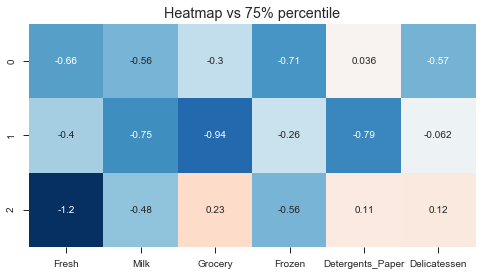

In [19]:
#Implementation: selecting samples

# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [60,110,160]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

plt.axes().set_title("Heatmap vs 75% percentile")
sns.heatmap((samples-data.quantile(q=0.75))/data.std(ddof=0), annot=True, cbar=False, square=True)

([<matplotlib.axis.XTick at 0xd027630>,
 <a list of 3 Text xticklabel objects>)

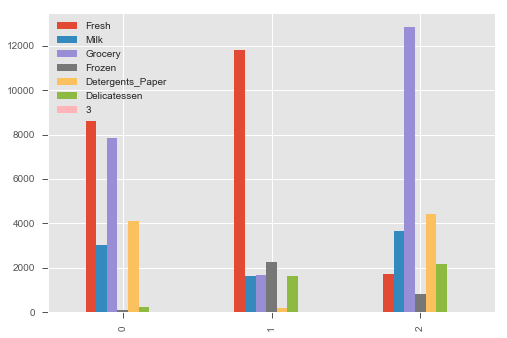

In [20]:
#To visualize spending of the average customer

samples_cpy = samples.copy()
samples_cpy[samples.shape[0]] = data.median()

plt.style.use('ggplot')
samples_cpy.plot(kind='bar')
labels = samples.index.values.tolist()
labels.append("Data Median")
plt.xticks(range(samples.shape[0]),labels)

Question 1

Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.

What kind of establishment (customer) could each of the three samples you've chosen represent?

Hint: Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying "McDonalds" when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

Fresh: 12000.2977
Milk: 5796.2
Grocery: 3071.9
Detergents_paper: 2881.4
Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be?

Answer:
    
Original Index 60:The first customer selected can be SuperMarket (retailer Grocery Store) based on their higher than average purchase costs across all product categories.   
    
Original Index 110:The second customer selected can be Restaurant or a coffee-shop/cafe based on their higher than average purchase costs of Fresh food, Grocery and milk and lower purchase costs of Detergent,delicatessen (i.e.meats) and Frozen.

Original Index 160:Third customer is probably a grocery store that doesn't carry a great deal of fresh food
because it buys very little fresh food, a median amount of milk, a huge amount of groceries.


Implementation: Feature Relevance

One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:

Assign new_data a copy of the data by removing a feature of your choice using the DataFrame.drop function.

Use sklearn.cross_validation.train_test_split to split the dataset into training and testing sets.

Use the removed feature as your target label. Set a test_size of 0.25 and set a random_state.

Import a decision tree regressor, set a random_state, and fit the learner to the training data.

Report the prediction score of the testing set using the regressor's score function.

In [21]:
from sklearn.cross_validation import train_test_split
from sklearn import tree

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
detergents_array = data['Detergents_Paper']

#Drop the feature Detergents_Paper
new_data = data.drop(['Detergents_Paper'],axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
# Split the data using detergents_array as your target label
X_train, X_test, y_train, y_test = train_test_split(new_data, detergents_array, test_size=0.25, random_state=29)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor(random_state=29)
regressor.fit(X_train, y_train)
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("score of the testing set is:",score)

score of the testing set is: 0.775022714781


In [22]:
data = pd.read_csv("customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)


# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
# Drop the feature Fresh
Fresh_array = data['Fresh']

#Drop the feature Detergents_Paper
new_data = data.drop(['Fresh'],axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
# Split the data using Frozen_array as your target label
X_train, X_test, y_train, y_test = train_test_split(new_data, Fresh_array, test_size=0.25, random_state=29)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor(random_state=29)
regressor.fit(X_train, y_train)
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("score of the testing set is:",score)

score of the testing set is: 0.217752343664


Question 2:
    
Which feature did you attempt to predict?
What was the reported prediction score?
Is this feature necessary for identifying customers' spending habits?

Hint: The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. 
    A negative R^2 implies the model fails to fit the data. 
    If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict 
    using the other features, thereby making it an important feature to consider when considering relevance.
    
    
Answer:


I attempted to predict the 'Detergents_Paper' feature
The reported prediction score (R^2) using DecisionTreeRegressor was 77.50%
As the score achieved is reasonably high, this suggests that the other features correlate well with 'Detergents_Paper' and that it is not necessary and does not provide a large amount of information gain.
This contrasts differently with other features - for example 'Fresh' produces a score of 21%, suggesting it is a more critical value.



Visualize Feature Distributions

To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


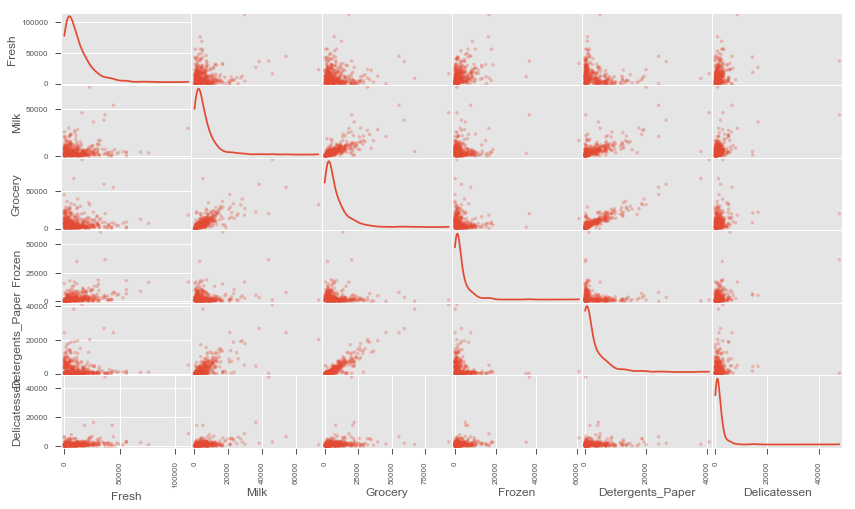

In [23]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

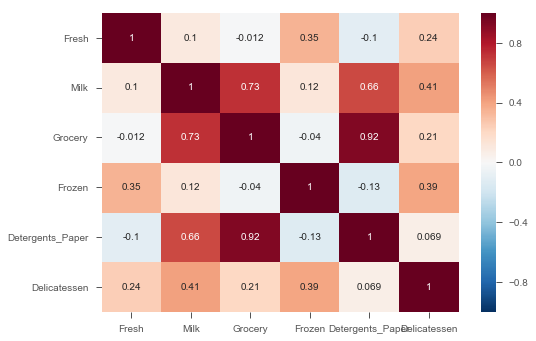

In [24]:
sns.heatmap(data.corr(), annot=True)

Question 3

Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.

Are there any pairs of features which exhibit some degree of correlation?
Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?
How is the data for those features distributed?

Hint: Is the data normally distributed? Where do most of the data points lie? You can use corr() to get the feature correlations and then visualize them using a heatmap(the data that would be fed into the heatmap would be the correlation values, for eg: data.corr()) to gain further insight.

Answer:

From the scatter matrix and heatmap the following pairs of features seem to indicate some correlation, Starting with the highest correlation coefficient:
- *Detergents_Paper* and *Grocery*: We can see a linear correlation here that's apparently strongly correlated with a coefficient of 0.92.

- *Grocery* and *Milk*: Another linear correlation with similar strength to Grocery+Milk of 0.73.

- *Detergents_Paper* and *Milk*: Another linear correlation, but less clear than Detergents_Paper+Grocery - with a correlation coefficient of 0.66. 


Hence, we can determine that *Detergents_Paper* has a weak relevance in establishing the profile of the data, which backs up the conclusion from the previous score.  This is because it correlates well with *Milk* and *Grocery*, so there is not much information gain by adding the parameter.

For the mentioned pairs, the data in these points tends to follow a linear `y = mx + c` relationship.  

In general, the distribution for the points seem highly skewed towards the origin, and don't follow a normal profile.  This suggests that smaller outlets compromise the majority of customers.


Data Preprocessing

In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.



Implementation: Feature Scaling

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:

Assign a copy of the data to log_data after applying logarithmic scaling. Use the np.log function for this.

Assign a copy of the sample data to log_samples after applying logarithmic scaling. Again, use np.log.



C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


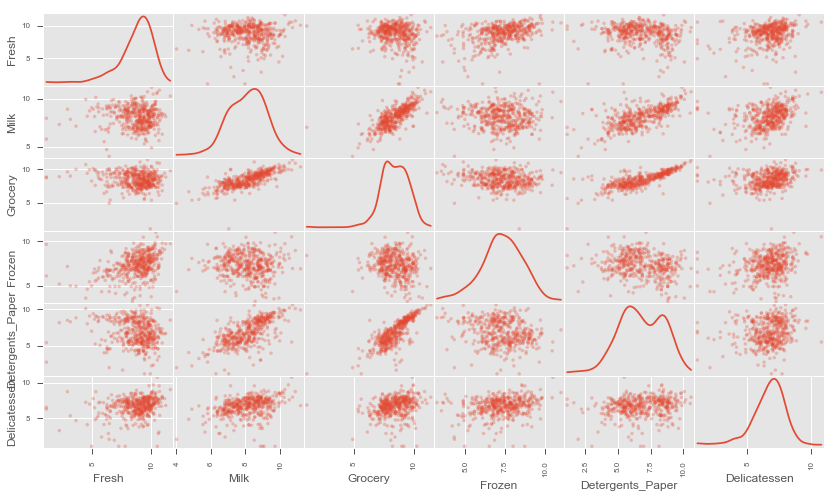

In [25]:
import numpy as np
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

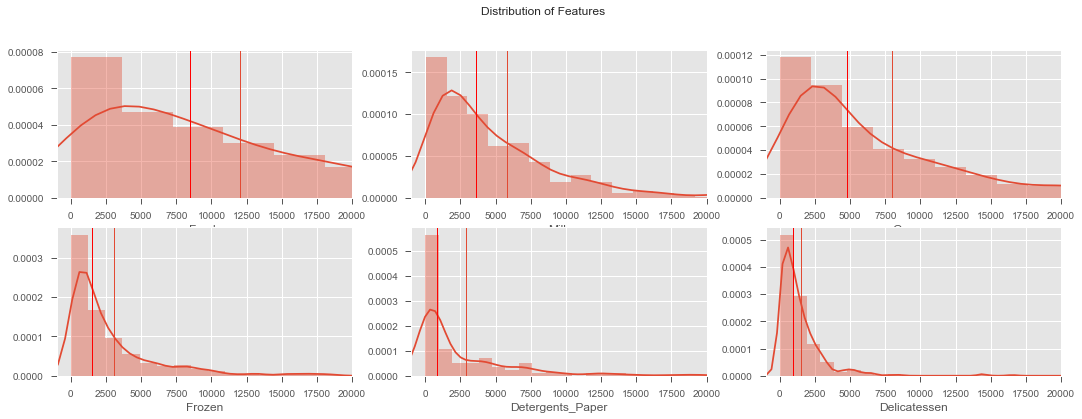

In [26]:
#To visualize the distribution of features before feature scaling

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

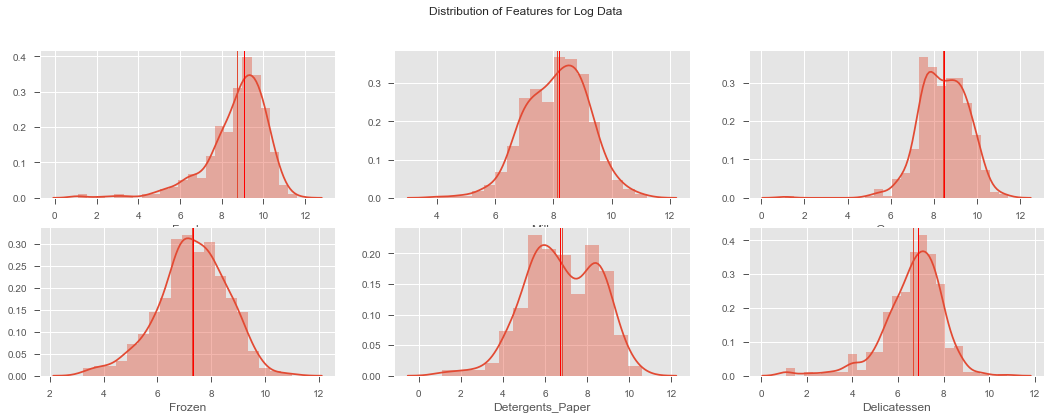

In [27]:
#To visualize the distribution of features after feature scaling
#Here the data appears to be in normal distribution after taking logarithm of the data

import numpy as np
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)


fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

Observation

After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [28]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.058354,8.021256,8.968778,4.564348,8.317522,5.416100
1,9.377379,7.407318,7.434848,7.730175,5.129899,7.406711
2,7.452982,8.202756,9.458918,6.714171,8.394800,7.676474


Implementation: Outlier Detection

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:

    Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
    Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
    Assign the calculation of an outlier step for the given feature to step.
    Optionally remove data points from the dataset by adding indices to the outliers list.

NOTE: If you choose to remove any outliers, ensure that the sample data does not contain any of these points!
Once you have performed this implementation, the dataset will be stored in the variable good_data.


In [29]:
#Outlier detection
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print ("Outlier step:", step)
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    
    outliers += feature_outliers.index.tolist()




Outlier step: 2.53350786861
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Outlier step: 2.31824827282
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Outlier step: 2.3988562138
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Outlier step: 2.34932750101
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Outlier step: 4.08935876094
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Outlier step: 2.24228065442
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [30]:
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

# Drop the outliers to have the good data
print("The good data after removing outliers is as follows: ")
display(good_data)

print ("Number of outliers (inc duplicates): ", len(outliers))
print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))

The good data after removing outliers is as follows: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


Number of outliers (inc duplicates):  48
New dataset with removed outliers has 398 samples with 6 features each.


Question 4

Are there any data points considered outliers for more than one feature based on the definition above?
Should these data points be removed from the dataset?
If any data points were added to the outliers list to be removed, explain why.

Hint: If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

Answer:

Number of outliers is 48.
Several datapoints were outliers for more than one feature
- 154: An outlier for Delicatessen, Milk and Grocery.  
- 128: An outlier for Delicatessen and Fresh.  
- 75: An outlier for Detergents_Paper and Grocery.  
- 66: An outlier for Delicatessen and Fresh
- 65: An outlier for Frozen and Fresh

Considering all of the outliers it seems reasonable to remove these from the overall data because they represent truly unusual points with respect to the rest of the data, and would only skew the results.

They add no value to any predictive models, therefore will be of little use in forming clusters of similar customers.



Feature Transformation

In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:

    Import sklearn.decomposition.PCA and assign the results of fitting PCA in six dimensions with good_data to pca.
    Apply a PCA transformation of log_samples using pca.transform, and assign the results to pca_samples.



Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


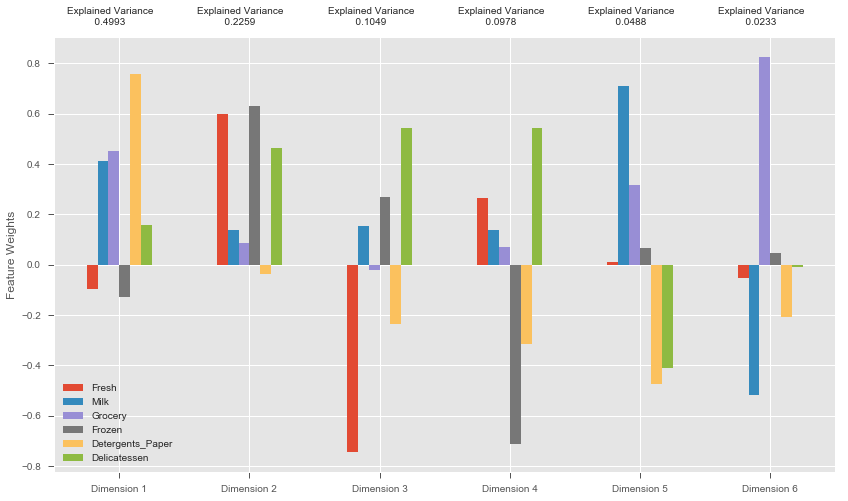

In [31]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6) # random_state only available from 0.18.0 onwards
pca.fit(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

# display cumulative variance:
print (pca_results['Explained Variance'].cumsum()) 

Question 5

How much variance in the data is explained in total by the first and second principal component?
How much variance in the data is explained by the first four principal components?
Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

Hint: A positive increase in a specific dimension corresponds with an increase of the positive-weighted features and a decrease of the negative-weighted features. The rate of increase or decrease is based on the individual feature weights.

Answer:

Answer: First 2 principal components:

    1st PC: 49.9%
    2nd PC: 22.6%
    Total: 72.5%

First 4 principal components:
    1st PC: 49.9%
    2nd PC: 22.6%
    3rd PC: 10.5%
    4th PC: 9.8%
    Total: 92.8%

Each component represents different sections of customer spending

1st dimesnsion represents a wide variety of the featureset. Mainly it represents Detergents_Paper, but also provides information Gain for Milk, Grocery which are the 3 features we identified above as being most highly correlated. 
However, it badly predicts Fresh and Frozen categories and needs another component to help. This could represent the a convenience store or supermarket.

2nd dimension relies on Fresh and Frozen, and Delicatessen features. It provides small gains for Milk and Grocery, and a very small loss of Detergents_Paper. It appears to be orthogonal to the first, reducing the impact of Milk, Grocery, and Detergents.This could represent a restaurant. 

3rd dimension represents losses for Fresh and Detergents_Paper, and minimal or losses for other categories. This could represent smaller corner shops, with convenience items and small amounts of groceries.
It represents the Customer who spends heavily on Delicatessen, decently on milk, frozen and very little on fresh and Detergents_Paper(negative correlation shown in the 3 rd dimension)

4th dimension represents Frozen and Detergents_Paper, and losses for other categories. This could represent buyers of frozen goods, such as fish importers.
It represents the Customer who spends heavily on Delicatessen, decently on fresh, milk, grocery and very little on frozen and Detergents_Paper(negative correlation shown in the 4 th dimension)

From 3rd and 4 th dimension we can conclude that there is negation correlation between Delicatessen and Fresh, Frozen, Detergents paper. That is when Delicatessen expenditure is more then Fresh, Frozen, Detergents paper expenditure is always less or very little.

Observation

Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.


In [32]:
import pandas as pd
#Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.5052,-2.3960,-1.9949,0.8649,-0.2403,0.0596
1,-1.9824,0.6177,0.3769,0.5887,-0.2576,-0.1144
2,2.0977,-0.8949,1.0009,0.1694,-0.7983,0.5219


Implementation: Dimensionality Reduction

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:

    Assign the results of fitting PCA in two dimensions with good_data to pca.
    Apply a PCA transformation of good_data using pca.transform, and assign the results to reduced_data.
    Apply a PCA transformation of log_samples using pca.transform, and assign the results to pca_samples.



,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.128,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.630,-0.0376,0.4634


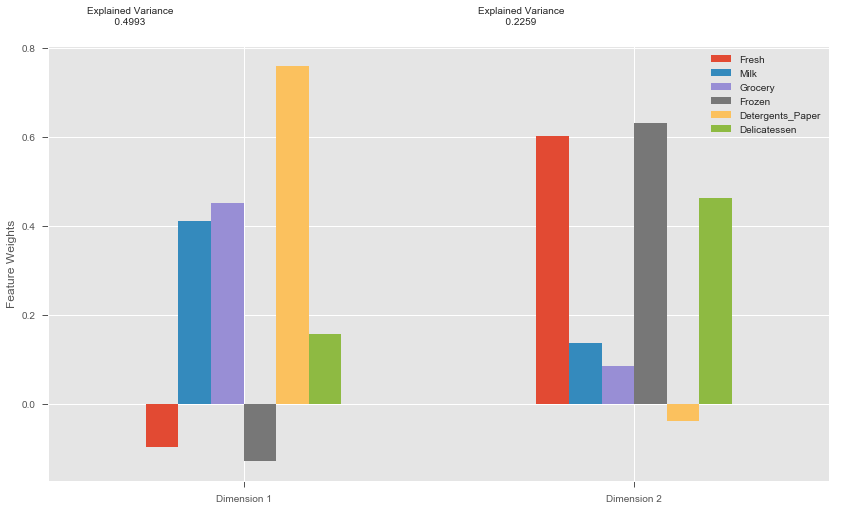

In [33]:
#Implementation: Dimensionality reduction
#TODO: Fit PCA to the good data using only 2 dimensions
pca = PCA(n_components=2).fit(good_data)

#TODO: Apply a PCA transformation the good_data
reduced_data = pca.transform(good_data)

#TODO: Apply a PCA trnsformation to the sample log-data
pca_samples =  pca.transform(log_samples)

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
#reduced_data = pd.DataFrame(reduced_data, columns = (['Dimension 1'],['Dimension 2']))
vs.pca_results(good_data, pca)

Observation

Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.


In [34]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))


,Dimension 1,Dimension 2
0,1.5052,-2.3960
1,-1.9824,0.6177
2,2.0977,-0.8949


Visualizing a Biplot

A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case Dimension 1 and Dimension 2). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.


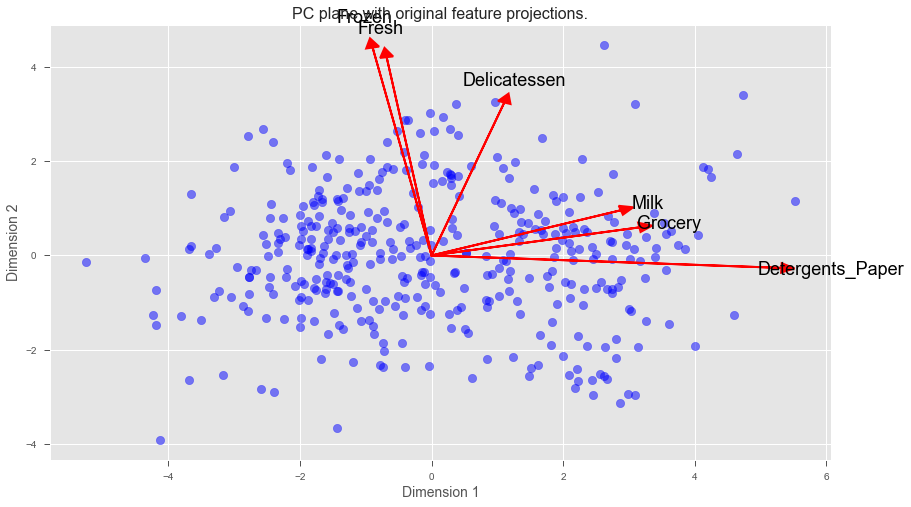

In [35]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on 'Milk', 'Grocery' and 'Detergents_Paper', but not so much on the other product categories.

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

Answer:

From the biplot, the original features are most strongly correlated with the first component are Milk, Grocery and Detergents_paper. 

The features associated with the second component are Fresh, Frozen and Delicatessen.

Yes these observations agree with the pca_results plot obtained earlier.


Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale.


Question 6

    What are the advantages to using a K-Means clustering algorithm?
    What are the advantages to using a Gaussian Mixture Model clustering algorithm?
    Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

Hint: Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

Answer:

K-Means Clustering:

1. It is an algorithm, which classifies samples based on attributes/features into K number of clusters. 

2. Clustering or grouping of samples is done by minimizing the distance between sample and the centroid. i.e. Assign the centroid and optimize the centroid based on the distances from the points to it. This is called as Hard Assignment.  

3. We are certain that particular points belong to particular centroid and then based on the least squares distance method, we will optimize the place of the centroid.

Advantages of K-Means:

1. Running Time

2. Better for high dimensional data.

3. Easy to interpret and Implement.




Gaussian Mixture Model

A Gaussian Mixture Model is a method of 'soft clustering' where instead of Hard assgning data points to a cluster, if we are uncertain about the data points where they belong or to which group, we use this method. 
It uses probability of a sample to determine the feasibility of it belonging to a cluster.

By using Gaussian distributions and probabilities, data points do not necessarilly have to be assigned rigidly, and ones with lower probability could be assigned to multiple clusters at once. 

Advantages of Gaussian Mixture Model:

1. It is able to assign non-spherical clusters. Moreover, it can be used to predict probabilities of events rather than rigid features.

2. Does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well.

3. Does not bias the cluster sizes to have specific structures as does by K-Means (Circular).


From the biplot, it can be observed that the data points are mostly densily packed and don't clearly belong to one particular cluster or another.
It seems more logical that applying a Gausian Mixture Model will produce the best outcome for the current problem at hand. 

Implementation: Creating Clusters

Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known a priori, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:

    Fit a clustering algorithm to the reduced_data and assign it to clusterer.
    Predict the cluster for each data point in reduced_data using clusterer.predict and assign them to preds.
    Find the cluster centers using the algorithm's respective attribute and assign them to centers.
    Predict the cluster for each sample data point in pca_samples and assign them sample_preds.
    Import sklearn.metrics.silhouette_score and calculate the silhouette score of reduced_data against preds.
    Assign the silhouette score to score and print the result.


In [36]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

def produceGMM(k):
    global clusterer, preds, centers, sample_preds
    
    # Apply your clustering algorithm of choice to the reduced data 
    
    # Apply Gausian mixture model
    clusterer = GMM(n_components=k, random_state=0)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_ 
    
    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'    
for k in range(2,16):
    score = produceGMM(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

display(results)
print("score using GMM:",score)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_m

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: De

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: De

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: De

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: De

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: De

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: De

Number of Clusters,Silhouette Score
2,0.443601
3,0.357295
4,0.291646
5,0.265822
6,0.307123
7,0.295333
8,0.301156
9,0.283717
10,0.262954
11,0.216130


score using GMM: 0.19437787127


Question 7

Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?

Answer:

The silhouette scores for several sizes of clusters are displayed above.

Considering all the results, a Gaussian Mixture Model with 2 clusters has the best silhouette score of 0.443601.


Cluster Visualization

Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters.


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function

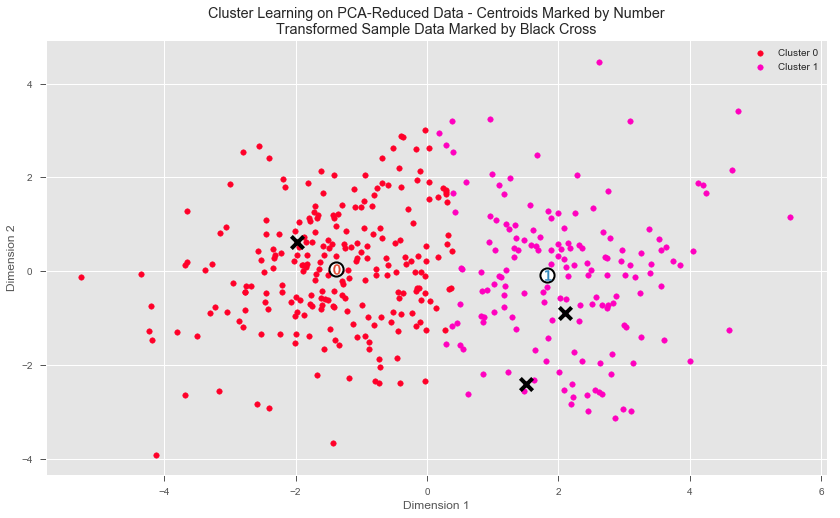

In [37]:
# Use the optimal cluster we found previously
# use 2 clusters 
produceGMM(2)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

Implementation: Data Recovery

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:

Apply the inverse transform to centers using pca.inverse_transform and assign the new centers to log_centers.

Apply the inverse function of np.log to log_centers using np.exp and assign the true centers to true_centers.



In [38]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segment 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0


Question 8

Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. What set of establishments could each of the customer segments represent?
Hint: A customer who is assigned to 'Cluster X' should best identify with the establishments represented by the feature set of 'Segment X'.


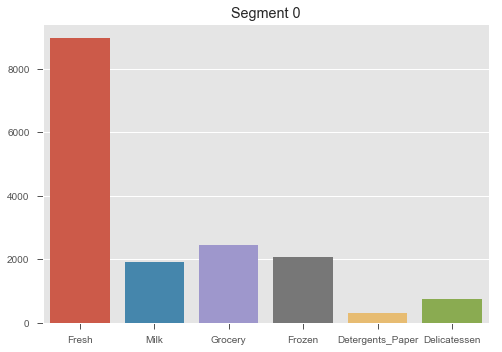

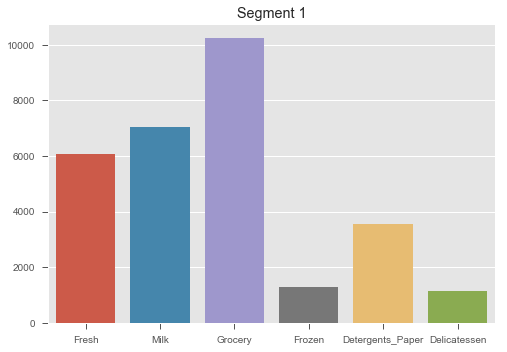

In [39]:
plt.figure()
plt.axes().set_title("Segment 0")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values)

plt.figure()
plt.axes().set_title("Segment 1")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values)


Answer:

Cluster/Segment 0: This most likely represents restaurants and cafes serving fresh food due to the strong weight upon the Fresh category. It is consistent with the original prediction for what a Restaurant might look like in the Data Explotation section.

Cluster/Segment 1: This most likely represents supermarkets as the quantities of Grocery and Milk are predominant here. 
The Milk and Grocery values in this cluster exceed the overall means observed in the Data Exploration section.


Question 9

For each sample point, which customer segment from Question 8 best represents it? Are the predictions for each sample point consistent with this?

Run the code block below to find which cluster each sample point is predicted to be.


In [40]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


Answer:

Original Index 60: The original prediction was a supermarket, this matches the cluster it has been assigned.

Original Index 110: The original prediction was a coffee-shop/cafe, this is consistent with it's cluster assignment.

Original Index 160: The original prediction was a grocery store, once again it matches the cluster assignment


Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the customer segments, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which segment that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the customer segments to a hidden variable present in the data, to see whether the clustering identified certain relationships.


Question 10

Companies will often run A/B tests when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?
Hint: Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?


Answer:

The model has established two main customer types - 
Cluster 1 'supermarkets'/'bulk distributors' and Cluster 0 'restaurants/cafes' who depend mainly on fresh food.

It is likely that customers from Cluster 0 who serve lots of fresh food might not react positively about delivery service change from 5 days a week to 3 days a week as 5 day a week delivery is needed to get fresh food.

Cluster 1 could be more flexible and might react positively because they do not buy more of perishable goods so they do not need a daily delivery. Instead they can buy more of non-perishable goods.


With this in mind, the Company could run A/B tests and generalize. By picking a subset customers from each Cluster, they can evaluate feedback seperately. It could be established whether changing the delivery service is critical to each segment, and whether customers are happy with the change.

If a trend is found in a particular cluster, it allows a business to make educated and targeted decisions that would benefit their customers going forward depending on their profile. This is as opposed to which would generalize the entire customer-base.


Question 11

Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a customer segment it best identifies with (depending on the clustering algorithm applied), we can consider 'customer segment' as an engineered feature for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a customer segment to determine the most appropriate delivery service.
How can the wholesale distributor label the new customers using only their estimated product spending and the customer segment data?
Hint: A supervised learner could be used to train on the original customers. What would be the target variable?

Answer:


The wholesale distributor could train a supervised machine learning classification algorithm (e.g. SVC, or decision tree classifier, etc) with the initial dataset's customer product spending as inputs and the 'customer segments' as the target variable. Once the classifier is trained it can be used to predict the customer segment for new customers which would then determine the most appropriate delivery service (3 days per week or 5 days per week).


Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the 'Channel' and 'Region' features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the 'Channel' feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either 'HoReCa' (Hotel/Restaurant/Cafe) or 'Retail' the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.


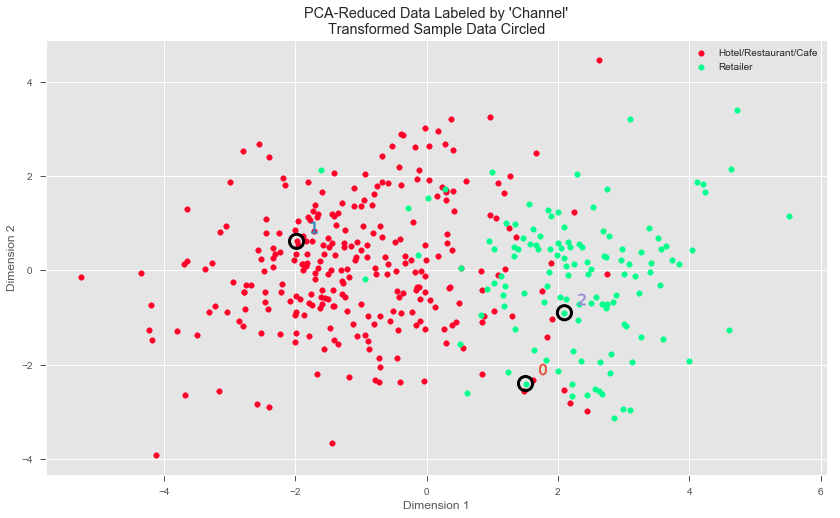

In [41]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

Question 12

How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?

Answer:

The actual data appears to correlate very strongly with our predicted clusters earlier. It shows that the GMM clustering was able to establish the key relationships very well. It wasn't able to capture some of the more anamolous data points - particularly Retailers lying within the Hotel/Restaurant/Cafe cluster.

Both the GMM algorithm and the number of clusters chosen are highly comparable to the underlying distribution shown in the plot above. The customer segments as classified here closely match those I previously defined in Question 8 (i.e Green points: Market/Convenience Store, Red Points: Restaurants.)
